# A Housing Price-prediction Model
### —To support Zillow’s housing price-prediction model

**Authors**: Daniel Arthur, Sumedh Bhardwaj, Emiko Naomasa

-----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from sklearn.dummy import DummyRegressor

from sklearn.feature_selection import RFE



In [2]:
df = pd.read_csv('data/kc_house_data.csv')

df.drop_duplicates(inplace=True)
df.shape

(21597, 21)

In [3]:
df.price.mean()

540296.5735055795

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 1. Business Understanding 
- Zillow is the most used online real estate site. The current model they use to evaluate the price of homes has a median error rate of 1.9%. However, this error rate increases to 2.3% in Washington. This results in 9.8% of houses being at or above a 10% error rate. This can equate to 10s of thousands of dollars on an individual scale and millions at a company level. 
- Zillow is interested in improving the prediction accuracy of their in-house housing price-prediction model. And we are creating a model to reduce the errors in the Washington area. Having a better model will encourage use of the site and increase revenue. 
- We contracted with Zillow to **(1) develop a prediction model that will help Zillow to predict future home prices** and **(2) provide an inferential analysis to be fed into on our prediction model.** 

## 2. Data

- We use a dataset on market housing prices for King County, which includes Seattle. It includes the sold prices of houses between May 2014 and May 2015, as well as 20 various housing features, such as the square footage of a living space, the geographical locations of the house, and so on. 
- The total number of observations is 21597. 
- For this project, we limit our analysis to the following 12 variables due to our time constraints.

We cleaned the following 12 variables from the dataset, and we evaluated the outliers, the missed entries of data, and other issues in each variable. 
- **id:** Unique identification (ID) for each sold house 
- **date:** Date the house was sold 
- **price:** Price of the house sold
- **bedrooms:** Number of bedrooms
- **bathrooms:** Number of bathrooms
- **sqft_living:** Square footage of the house’s interior living space
- **sqft_lot:** Square footage of the land space
- **floors:** Number of floors
- **waterfront:** A dummy variable for whether the house is on a waterfront
- **condition:** An index from 1 to 5 on the overall condition of the house. Related to maintenance of house.
- **grade:** An index from 1 to 13 on the grade of the house, where 1 means poor construction and design, and 13 means high quality. It is related to the construction and design of the house.
- **vintage:** House vintage (years) = the year the house was sold - the year the house was built 
- **zipcode**


In [5]:
# The data covers 2014 & 2015. 
pd.DatetimeIndex(df['date']).year.unique()

Int64Index([2014, 2015], dtype='int64', name='date')

In [6]:
# Drop the following variables (according to the project description). 
drop=['view', 'sqft_above', 'sqft_basement', 'yr_renovated',
      'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Reassigne dataframe
df.drop(labels=drop, axis=1, inplace=True)

In [7]:
# 12 variables, n=21597  
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   date         21597 non-null  object 
 2   price        21597 non-null  float64
 3   bedrooms     21597 non-null  int64  
 4   bathrooms    21597 non-null  float64
 5   sqft_living  21597 non-null  int64  
 6   sqft_lot     21597 non-null  int64  
 7   floors       21597 non-null  float64
 8   waterfront   19221 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.3+ MB


## 2.1 Data Manipulation

In [8]:
# 5 points statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,0.5,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.0,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
yr_built,21597.0,1.971000e+03,2.937523e+01,1900.0,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
zipcode,21597.0,9.807795e+04,5.351307e+01,98001.0,9.803300e+04,9.806500e+04,9.811800e+04,9.819900e+04


### Missing variables (waterfront)

In [9]:
# waterfront has 2376 missing variables 
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
zipcode           0
dtype: int64

In [10]:
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [11]:
# convert nan => 'N/A'
df.waterfront = df.waterfront.fillna('N/A')

In [12]:
df.waterfront.unique()

array(['N/A', 'NO', 'YES'], dtype=object)

In [13]:
# zipcode of houses for missing waterfront variables  
waterfront_na = df.loc[df.waterfront=='N/A']
waterfront_na.zipcode.unique()

# from the zipcode, can not tell if 'N/A' = 'NO'

array([98178, 98007, 98030, 98074, 98105, 98166, 98004, 98056, 98058,
       98168, 98118, 98003, 98133, 98177, 98034, 98103, 98126, 98038,
       98040, 98053, 98023, 98052, 98042, 98059, 98117, 98146, 98014,
       98006, 98116, 98033, 98115, 98045, 98019, 98055, 98188, 98024,
       98125, 98198, 98031, 98109, 98002, 98065, 98144, 98199, 98092,
       98102, 98155, 98075, 98011, 98136, 98072, 98008, 98106, 98027,
       98029, 98005, 98070, 98028, 98022, 98108, 98010, 98001, 98112,
       98077, 98107, 98122, 98148, 98119, 98032, 98039])

### Housing price (y)

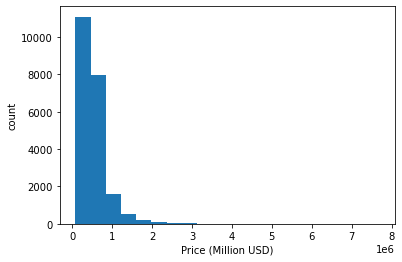

In [14]:
# Outliers skewe the distribution.  
plt.hist(x=df.price, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');


In [15]:
print(f'Threshold price for top 1%: {df.price.quantile(0.99)}')
print(f'Threshold price for top 2.5%: {df.price.quantile(0.975)}')
print(f'Threshold price for top 5%: {df.price.quantile(0.95)}')

Threshold price for top 1%: 1970000.0
Threshold price for top 2.5%: 1490000.0
Threshold price for top 5%: 1160000.0


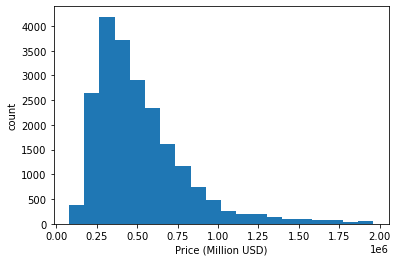

In [16]:
# If we drop top 1% (price >= 1970000), distribution looks less skewed 
x=df.loc[df.price < df.price.quantile(0.99)].price
plt.hist(x=x, bins=20)

plt.xlabel("Price (Million USD)")
plt.ylabel('count');

In [17]:
# for the following analysis, we dropped the top 1 percent of houses in terms of housing price. 

df = df.loc[(df.price < df.price.quantile(0.99))].copy()


In [18]:
# Log transformation 
df['price_log']=np.log(df.price)

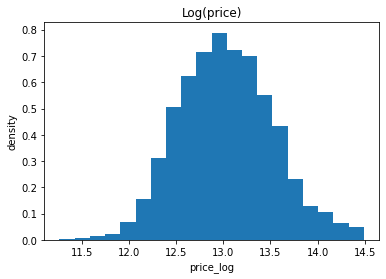

In [19]:
# Distribution of log(price) 

plt.hist(x=df.price_log, bins=20, density=True)
plt.title('Log(price)')
plt.xlabel('price_log')
plt.ylabel('density');

### Dependent Variables (X)

##### Number of Bedrooms

In [20]:
df.bedrooms.value_counts()

3     9789
4     6785
2     2758
5     1539
6      259
1      196
7       33
8       10
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
# Drop outlier (the house with 33 bedrooms)
df = df.loc[df.bedrooms!=33]

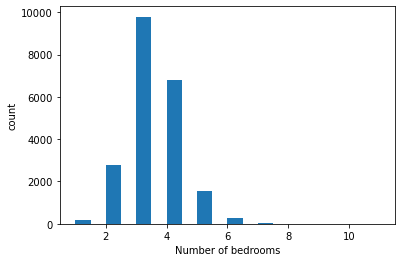

In [22]:
plt.hist(x=df.bedrooms, bins=20)

plt.xlabel('Number of bedrooms')
plt.ylabel('count');

##### Number of Bathrooms

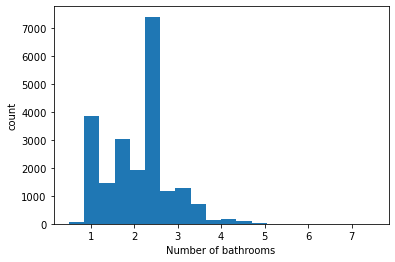

In [23]:
plt.hist(x=df.bathrooms, bins=20)

plt.xlabel('Number of bathrooms')
plt.ylabel('count');

##### Sqft_living

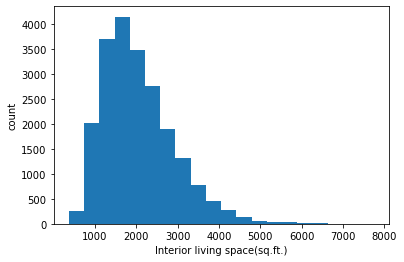

In [24]:
plt.hist(x=df.sqft_living, bins=20)

plt.xlabel('Interior living space(sq.ft.)')
plt.ylabel('count');

In [25]:
print(f'Threshold sqft_living for top 1%: {df.sqft_living.quantile(0.99)}')
print(f'Threshold sqft_living for top 2.5%: {df.sqft_living.quantile(0.975)}')
print(f'Threshold sqft_living for top 5%: {df.sqft_living.quantile(0.95)}')

Threshold sqft_living for top 1%: 4610.0
Threshold sqft_living for top 2.5%: 4090.0
Threshold sqft_living for top 5%: 3660.0


In [26]:
# number of houses which has sqft_living is above 99% threshold 
print(f'Number of houses which sqft_living > 99% threshold: {len(df.loc[df.sqft_living>df.sqft_living.quantile(0.99)])}')

# Average housing price for over 99% threshold sqft 
print (f'Average housing price for over 99% threshold sqft houses: {df.loc[df.sqft_living > df.sqft_living.quantile(0.99)].price.mean()}')


Number of houses which sqft_living > 99% threshold: 211
Average housing price for over 99% threshold sqft houses: 1298524.2085308058


##### sqft_lot

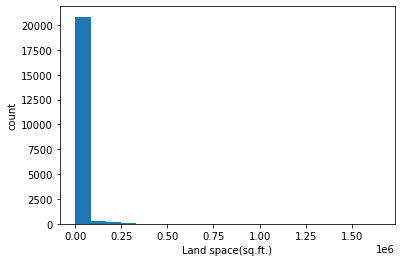

In [27]:
plt.hist(x=df.sqft_lot, bins=20)

plt.xlabel('Land space(sq.ft.)')
plt.ylabel('count');

##### floors

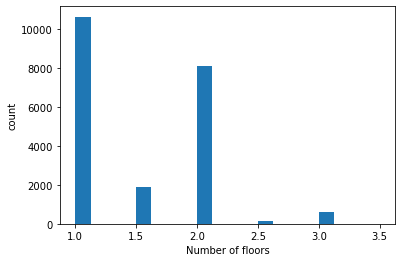

In [28]:
plt.hist(x=df.floors, bins=20)

plt.xlabel('Number of floors')
plt.ylabel('count');


##### House vintage = year of house was sold - year of house was built  

In [29]:
# vintage = year of house was sold - year of house was built  

# year of house was sold 
df['yr_sold']=pd.DatetimeIndex(df['date']).year

# year of house was sold - year of house was built
df['vintage'] = df['yr_sold'] - df['yr_built']



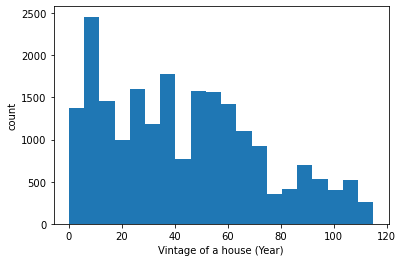

In [30]:
# There are 12 houses which vintage was negative (-1). 
# Since some people purchase houses before it is built, we change negative vintage to 0.  

df.vintage.replace({-1:0}, inplace=True)

plt.hist(x=df.vintage, bins=20)

plt.xlabel('Vintage of a house (Year)')
plt.ylabel('count');

#### categorical variables 

##### condition (categorical value)
- The overall condition of the house. 

In [31]:
df.condition.value_counts()

Average      13886
Good          5628
Very Good     1667
Fair           169
Poor            29
Name: condition, dtype: int64

In [32]:
# cond_good = 1 if condition = very good or good. 
df['cond_good'] = (df['condition'] =='Very Good') | ((df.condition =='Good')).astype(int)
df['cond_good']=df['cond_good'].astype(int)

# cond_ave = 1 if condition =average
df['cond_ave'] = (df['condition'] =='Average')
df['cond_ave']=df['cond_ave'].astype(int)

##### grade (categorical value)
- An index from 1 to 13 for a quality of construction and design.

In [33]:
df.grade.value_counts()

7 Average        8972
8 Good           6059
9 Better         2594
6 Low Average    2038
10 Very Good     1068
11 Excellent      324
5 Fair            242
12 Luxury          53
4 Low              27
13 Mansion          1
3 Poor              1
Name: grade, dtype: int64

In [34]:
# convert to numeric value (3(Poor)-13(Mansion))
df['grade'] = df['grade'].str.split().str[0]
df['grade']=df['grade'].astype(int)
df.grade.value_counts()

7     8972
8     6059
9     2594
6     2038
10    1068
11     324
5      242
12      53
4       27
13       1
3        1
Name: grade, dtype: int64

In [35]:
## grade_above_average dummy (if grade = [8(Good) - 13(Mansion)], grade_above_average =1)
df['grade_above_ave'] = (df['grade'] > 7).astype(int)
df.grade_above_ave.value_counts()

0    11280
1    10099
Name: grade_above_ave, dtype: int64

##### Waterfront dummy (Yes=1)

In [36]:
df.waterfront.replace({'N/A' : 'N/A_NO' }, inplace = True)

wd = pd.get_dummies(df.waterfront, prefix='waterfront_' , drop_first=False)

wd = wd.waterfront__YES

df = pd.concat([df, wd], axis=1)

df.drop(labels='waterfront', axis=1, inplace =True)

##### Seattle dummy (Seattle = 1)

In [37]:
# Create seattle dummy 
# In a city, sqft is smaller, price is higher. So, relationship between price and other house features will be different between houses in Seattle and houses outside of the city.

# 28 zipcodes for Seattle 
seattle_zipcode=[98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177]

df['seattle'] = [1 if x in seattle_zipcode else 0 for x in df.zipcode]
df.seattle.sum()
# 6297 houses are in seattle 

6879

## 3. EDA

- From the scatter plot figure, we see a linear relationship between housing price and sqft_living, sqft_lot, number of bedrooms, number of bathrooms, and housing grade. Also, the bar chart shows that the mean housing price on a waterfront house is more than three times the mean housing price not on a waterfront. The bar chart also shows a slight difference in the mean housing prices inside and outside of Seattle, but the difference is not as large as the price difference between a waterfront and non-waterfront property is. 



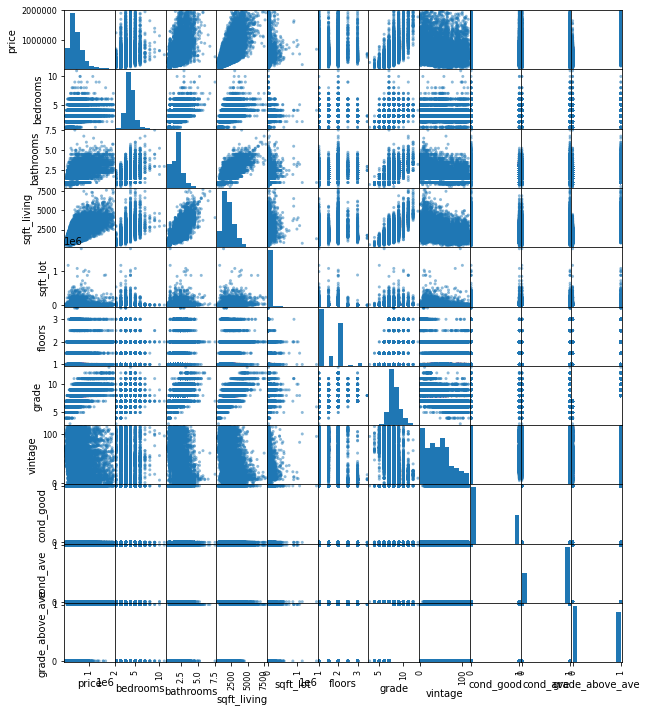

In [38]:
## scatter plot for continuous variables 

cont = df.select_dtypes(('int64', 'float64')).columns.drop(['id', 'yr_built', 'zipcode','seattle', 'yr_sold', 'price_log'])

pd.plotting.scatter_matrix(df[cont], figsize=(10,12));


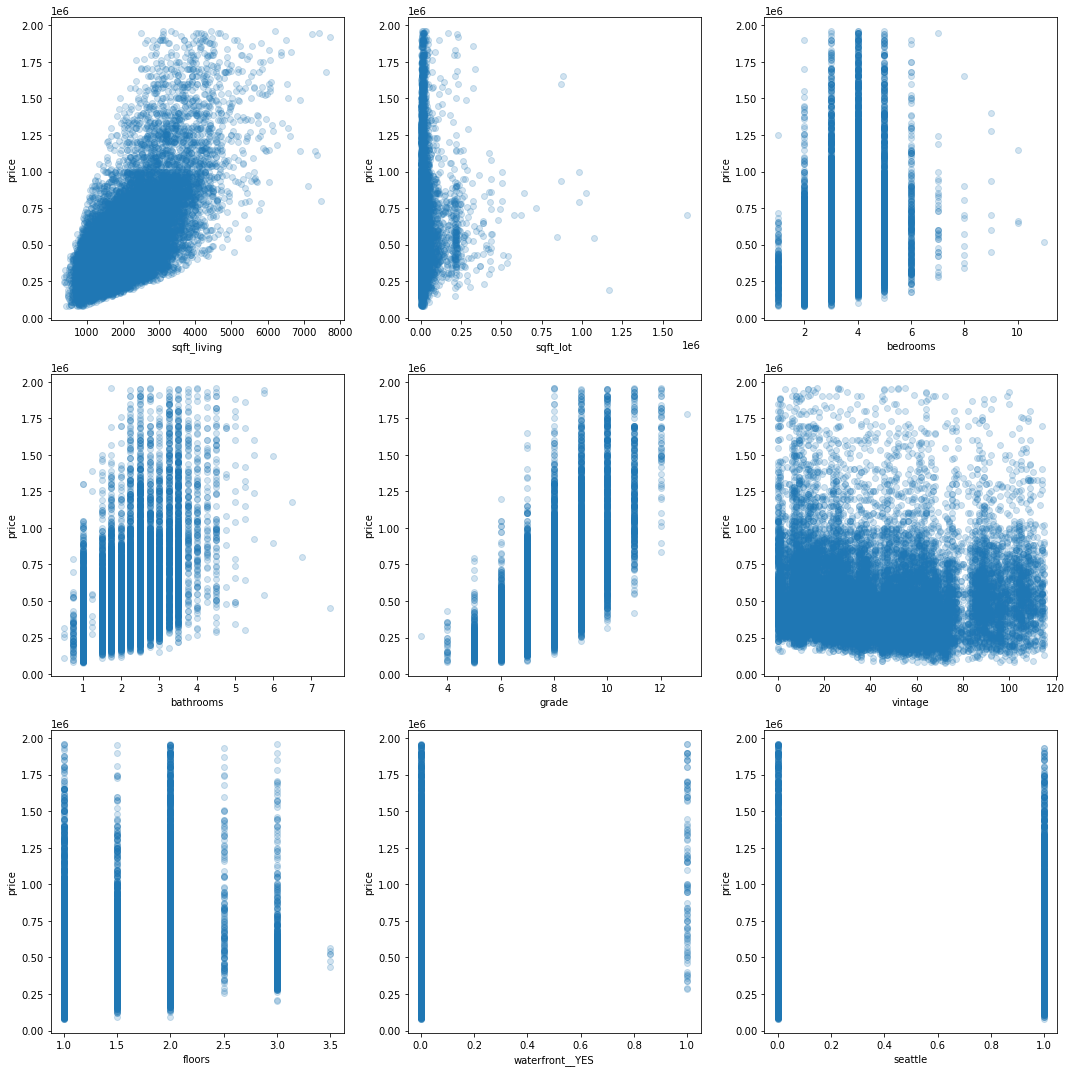

In [39]:
# Plotting X on y 

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))
fig.set_tight_layout(True)

xcont = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'vintage', 'floors', 'waterfront__YES', 'seattle']

for xcol, ax in zip(xcont, axes.flatten()):
    ax.scatter(df[xcol], df['price'], alpha=0.2)
    ax.set_xlabel(xcol)
    ax.set_ylabel("price")

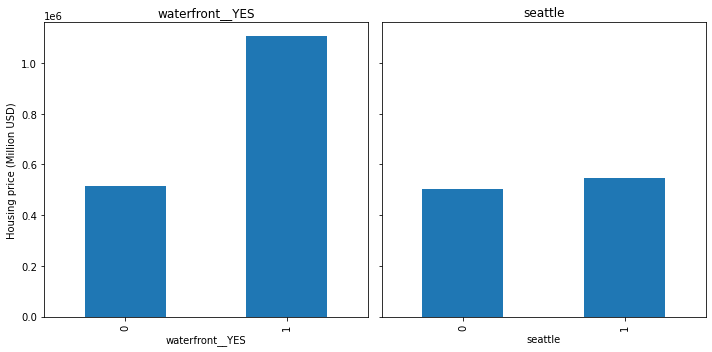

In [40]:
# Bar plots of average housing price by categories. 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10 , 5), sharey=True)

#select datatype=object
cate = df[['waterfront__YES', 'seattle']]

for xcol, ax in zip(cate, axes.flatten()):
    df.groupby(xcol).mean()['price'].sort_values().plot.bar(ax=ax)
    
    ax.set_title(xcol)
    ax.set_ylabel('Housing price (Million USD)')


    
    
fig.tight_layout()

## 4. Model

- To reduce multicollinearity issues in our model, we first excluded a home feature that displayed high correlations with the other features. We used a correlation of 0.6 as our threshold, using the correlation heatmap below. 

In [41]:
# drop id, date, condition from df
df.drop(labels=['id', 'date', 'condition', 'cond_ave'], axis=1, inplace=True)

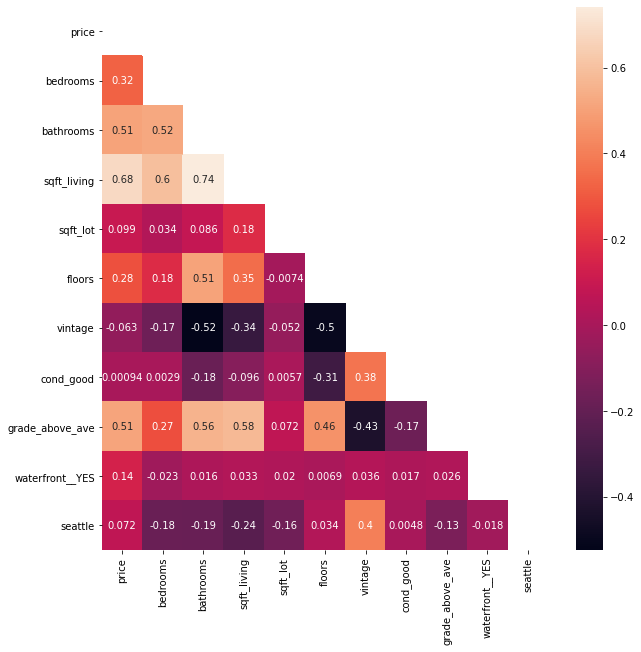

In [42]:
# Correlation Matrix 
corr = df.drop(labels=([ 'price_log', 'yr_sold', 'yr_built', 'grade', 'zipcode']), axis=1).corr()

# heatmap 
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=corr,
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax,
            annot = True,
            );

''

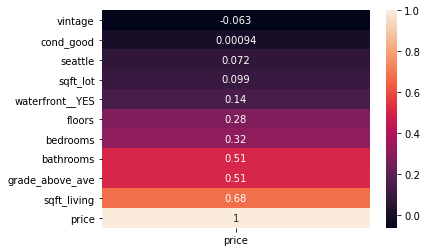

In [43]:
# Correlation between y and X


x = corr[['price']]
x = x.sort_values(by='price')
sns.heatmap(x, annot=True)
plt.savefig('Image/correlation_X_y')
;

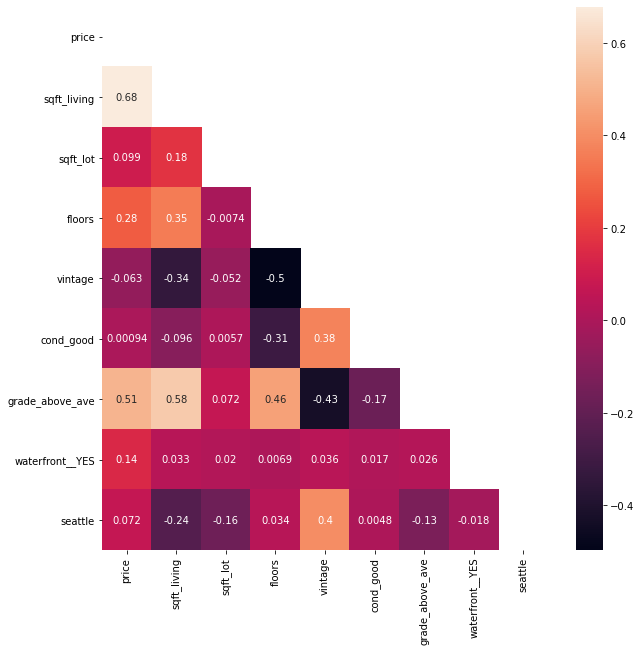

In [44]:
## # From the heatmap, we dropped the variables which report the correlation > 0.6
# sqft_living and bathroom (0.74)
# sqft_living and bedroom (0.6)
# => drop bathroom, bedroom 

# Correlation Matrix 
corr2 = df.drop(labels=([ 'price_log', 'yr_sold', 'yr_built', 'grade', 
                         'bathrooms', 'bedrooms', 'zipcode']), axis=1).corr()

# heatmap 
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(data=corr2,
            mask=np.triu(np.ones_like(corr2, dtype=bool)), 
            ax=ax,
            annot = True,
            );




''

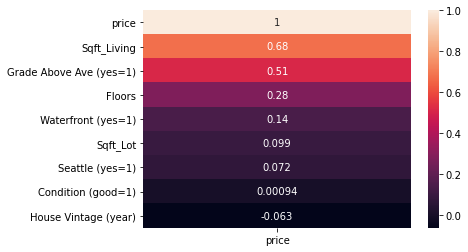

In [45]:
# Correlation between y and X after dropping variables which report correlation >0.6.  


y_axis_labels = ['price', 'Sqft_Living', 'Grade Above Ave (yes=1)', 'Floors', ' Waterfront (yes=1)', 'Sqft_Lot', 
                 'Seattle (yes=1)', 'Condition (good=1)', 'House Vintage (year)'] 


x2 = corr2[['price']]
x2 = x2.sort_values(by='price', ascending=False)
sns.heatmap(x2, annot=True, yticklabels=y_axis_labels)
#plt.savefig('Image/correlation_X_y_after_drop')
;


### 4.1 Inferential Model
- First, we conducted inferential analysis to find the key determinants with which to predict the housing market prices. For this analysis, we used a linear regression model to determine the relationships between housing prices and the other housing features. Using the findings from the inferential analysis, we ran a price-prediction model using a linear regression model.
- We started with a single linear regression of price and size of living area and then kept adding other housing features one by one from among the features highly related with price. In all model, we include zipcode to adjust an area fixed effect. We used R-squared score as the main measure with which to select a model. We kept adding features until the R-squared score stop increasing with additional features. 
- Following the above rule, we selected a model that included living space, a dummy variable for above-average house grade. We chose this model because adding other variables to the model at this point did not change the R-squared value or even worsened the score. 

In [46]:
# Model 1 : sqft_living, grade_above_ave , zipcode

formula1_1 = "price ~ sqft_living +C(zipcode) "
model1_1 = smf.ols(formula1_1, df).fit()
model1_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1011.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:46:07   Log-Likelihood:            -2.8320e+05
No. Observations:               21379   AIC:                         5.665e+05
Df Residuals:                   21308   BIC:                         5.671e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.053e+05   7577.851    -13.896      0.000    -1.2e+05   -9.05e+04
C(zipcode)[T.98002]  9129.8001   1.21e+04      0.753      0.451   -1.46e+04    3.29e+04
C(zipcode)[T.98003]  7821.0657   1.09e+04      0.716      0.474   -1.36e+04    2.92e+04
C(zipcode)[T.98004]  7.247e+05    1.1e+04     65.862      0.000    7.03e+05    7.46e+05
C(zipcode)[T.98005]  3.762e+05   1.28e+04     29.284      0.000    3.51e+05    4.01e+05
C(zipcode)[T.98006]  3.443e+05   9602.347     35.858      0.000    3.25e+05    3.63e+05
C(zipcode)[T.98007]  2.796e+05   1.36e+04     20.510      0.000    2.53e+05    3.06e+05
C(zipcode)[T.98008]  2.784e+05    1.1e+04     25.401      0.000    2.57e+05       3e+05
C(zipcode)[T.98010]    9.5e+04   1.55e+04      6.126      0.000    6.46e+04    1.25e+05
C(zipcode)[T.98011]  1.383e+05   1.22e+04     11.332      0.000    1.14e+05    1.62e+05
C(zipcode)[T.98014]  1.309e+05   1.43e+04      9.166      0.000    1.03e+05    1.59e+05
C(zipcode)[T.98019]  8.926e+04   1.23e+04      7.255      0.000    6.51e+04    1.13e+05
C(zipcode)[T.98022]  4.904e+04   1.15e+04      4.253      0.000    2.64e+04    7.16e+04
C(zipcode)[T.98023]  -1.19e+04   9481.424     -1.255      0.209   -3.05e+04    6683.913
C(zipcode)[T.98024]  2.117e+05    1.7e+04     12.478      0.000    1.78e+05    2.45e+05
C(zipcode)[T.98027]  2.022e+05   9938.608     20.340      0.000    1.83e+05    2.22e+05
C(zipcode)[T.98028]  1.368e+05   1.09e+04     12.558      0.000    1.15e+05    1.58e+05
C(zipcode)[T.98029]  2.515e+05   1.05e+04     23.852      0.000    2.31e+05    2.72e+05
C(zipcode)[T.98030]  3072.7981   1.12e+04      0.274      0.784   -1.89e+04     2.5e+04
C(zipcode)[T.98031]  1.389e+04    1.1e+04      1.262      0.207   -7686.091    3.55e+04
C(zipcode)[T.98032]  3748.4492   1.42e+04      0.263      0.792   -2.42e+04    3.17e+04
C(zipcode)[T.98033]  3.912e+05   9849.642     39.720      0.000    3.72e+05    4.11e+05
C(zipcode)[T.98034]  2.064e+05   9332.241     22.116      0.000    1.88e+05    2.25e+05
C(zipcode)[T.98038]  3.626e+04   9176.499      3.951      0.000    1.83e+04    5.42e+04
C(zipcode)[T.98039]  9.951e+05   2.65e+04     37.544      0.000    9.43e+05    1.05e+06
C(zipcode)[T.98040]  5.731e+05   1.12e+04     51.078      0.000    5.51e+05    5.95e+05
C(zipcode)[T.98042]  1.457e+04   9305.079      1.566      0.117   -3670.707    3.28e+04
C(zipcode)[T.98045]  1.252e+05   1.17e+04     10.666      0.000    1.02e+05    1.48e+05
C(zipcode)[T.98052]  2.688e+05   9236.664     29.099      0.000    2.51e+05    2.87e+05
C(zipcode)[T.98053]  2.497e+05   9989.283     25.000      0.000     2.3e+05    2.69e+05
C(zipcode)[T.98055]  4.725e+04   1.11e+04      4.270      0.000    2.56e+04    6.89e+04
C(zipcode)[T.98056]  1.079e+05   9938.541     10.858      0.000    8.84e+04    1.27e+05
C(z

In [47]:
# Model 2 : sqft_living, grade_above_ave , floors, , zipcode

formula2_1 = "price ~ sqft_living + C(grade_above_ave) +C(zipcode)"
model2_1 = smf.ols(formula2_1, df).fit()
model2_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1021.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:46:07   Log-Likelihood:            -2.8300e+05
No. Observations:               21379   AIC:                         5.661e+05
Df Residuals:                   21307   BIC:                         5.667e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -9.299e+04   7532.779    -12.345      0.000   -1.08e+05   -7.82e+04
C(grade_above_ave)[T.1]  4.775e+04   2383.726     20.033      0.000    4.31e+04    5.24e+04
C(zipcode)[T.98002]      1.689e+04    1.2e+04      1.406      0.160   -6655.207    4.04e+04
C(zipcode)[T.98003]      2016.8608   1.08e+04      0.186      0.852   -1.92e+04    2.32e+04
C(zipcode)[T.98004]      7.158e+05   1.09e+04     65.601      0.000    6.94e+05    7.37e+05
C(zipcode)[T.98005]      3.628e+05   1.27e+04     28.466      0.000    3.38e+05    3.88e+05
C(zipcode)[T.98006]      3.322e+05   9532.722     34.845      0.000    3.13e+05    3.51e+05
C(zipcode)[T.98007]      2.709e+05   1.35e+04     20.051      0.000    2.44e+05    2.97e+05
C(zipcode)[T.98008]      2.732e+05   1.09e+04     25.147      0.000    2.52e+05    2.94e+05
C(zipcode)[T.98010]      9.596e+04   1.54e+04      6.245      0.000    6.58e+04    1.26e+05
C(zipcode)[T.98011]      1.321e+05   1.21e+04     10.924      0.000    1.08e+05    1.56e+05
C(zipcode)[T.98014]      1.299e+05   1.42e+04      9.181      0.000    1.02e+05    1.58e+05
C(zipcode)[T.98019]      8.552e+04   1.22e+04      7.016      0.000    6.16e+04    1.09e+05
C(zipcode)[T.98022]      4.795e+04   1.14e+04      4.197      0.000    2.56e+04    7.03e+04
C(zipcode)[T.98023]      -1.94e+04   9401.055     -2.064      0.039   -3.78e+04    -975.061
C(zipcode)[T.98024]      2.116e+05   1.68e+04     12.587      0.000    1.79e+05    2.45e+05
C(zipcode)[T.98027]      1.906e+05   9863.489     19.321      0.000    1.71e+05     2.1e+05
C(zipcode)[T.98028]      1.315e+05   1.08e+04     12.176      0.000     1.1e+05    1.53e+05
C(zipcode)[T.98029]      2.285e+05   1.05e+04     21.737      0.000    2.08e+05    2.49e+05
C(zipcode)[T.98030]       817.4950   1.11e+04      0.074      0.941    -2.1e+04    2.26e+04
C(zipcode)[T.98031]      1.368e+04   1.09e+04      1.254      0.210   -7694.641     3.5e+04
C(zipcode)[T.98032]      1685.0551   1.41e+04      0.119      0.905    -2.6e+04    2.93e+04
C(zipcode)[T.98033]       3.84e+05   9764.985     39.329      0.000    3.65e+05    4.03e+05
C(zipcode)[T.98034]      2.069e+05   9245.830     22.378      0.000    1.89e+05    2.25e+05
C(zipcode)[T.98038]      3.291e+04   9093.030      3.619      0.000    1.51e+04    5.07e+04
C(zipcode)[T.98039]      9.846e+05   2.63e+04     37.487      0.000    9.33e+05    1.04e+06
C(zipcode)[T.98040]      5.616e+05   1.11e+04     50.459      0.000     5.4e+05    5.83e+05
C(zipcode)[T.98042]      1.181e+04   9219.910      1.281      0.200   -6260.299    2.99e+04
C(zipcode)[T.98045]        1.2e+05   1.16e+04     10.319      0.000    9.72e+04    1.43e+05
C(zipcode)[T.98052]      2.543e+05   9179.448     27.708      0.000    2.36e+05    2.72e+05
C(zipcode)[T.98053]      2.401e+05   9908.418  

In [48]:
# Model 3 : sqft_living, grade_above_ave , floors, waterfront, , zipcode

formula3_1 = "price ~ sqft_living + C(grade_above_ave) + C(floors) +C(zipcode)"
model3_1 = smf.ols(formula3_1, df).fit()
model3_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     958.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:46:08   Log-Likelihood:            -2.8296e+05
No. Observations:               21379   AIC:                         5.661e+05
Df Residuals:                   21302   BIC:                         5.667e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -9.179e+04   7524.669    -12.199      0.000   -1.07e+05    -7.7e+04
C(grade_above_ave)[T.1]  5.316e+04   2525.895     21.045      0.000    4.82e+04    5.81e+04
C(floors)[T.1.5]         9666.3331   3534.746      2.735      0.006    2737.964    1.66e+04
C(floors)[T.2.0]        -5621.7029   2452.747     -2.292      0.022   -1.04e+04    -814.134
C(floors)[T.2.5]         2.384e+04   1.17e+04      2.035      0.042     882.782    4.68e+04
C(floors)[T.3.0]        -4.202e+04   6196.894     -6.781      0.000   -5.42e+04   -2.99e+04
C(floors)[T.3.5]        -8.711e+04   5.56e+04     -1.567      0.117   -1.96e+05    2.18e+04
C(zipcode)[T.98002]      1.712e+04    1.2e+04      1.427      0.154   -6395.138    4.06e+04
C(zipcode)[T.98003]      1126.2643   1.08e+04      0.104      0.917   -2.01e+04    2.23e+04
C(zipcode)[T.98004]      7.149e+05   1.09e+04     65.500      0.000    6.93e+05    7.36e+05
C(zipcode)[T.98005]      3.597e+05   1.28e+04     28.181      0.000    3.35e+05    3.85e+05
C(zipcode)[T.98006]      3.308e+05   9538.664     34.681      0.000    3.12e+05     3.5e+05
C(zipcode)[T.98007]      2.701e+05   1.35e+04     20.016      0.000    2.44e+05    2.97e+05
C(zipcode)[T.98008]      2.714e+05   1.09e+04     24.957      0.000     2.5e+05    2.93e+05
C(zipcode)[T.98010]      9.455e+04   1.53e+04      6.162      0.000    6.45e+04    1.25e+05
C(zipcode)[T.98011]      1.318e+05   1.21e+04     10.914      0.000    1.08e+05    1.55e+05
C(zipcode)[T.98014]       1.29e+05   1.41e+04      9.128      0.000    1.01e+05    1.57e+05
C(zipcode)[T.98019]      8.664e+04   1.22e+04      7.112      0.000    6.28e+04    1.11e+05
C(zipcode)[T.98022]      4.598e+04   1.14e+04      4.028      0.000    2.36e+04    6.84e+04
C(zipcode)[T.98023]     -2.053e+04   9395.506     -2.185      0.029   -3.89e+04   -2111.518
C(zipcode)[T.98024]      2.107e+05   1.68e+04     12.552      0.000    1.78e+05    2.44e+05
C(zipcode)[T.98027]      1.899e+05   9850.587     19.278      0.000    1.71e+05    2.09e+05
C(zipcode)[T.98028]      1.311e+05   1.08e+04     12.156      0.000     1.1e+05    1.52e+05
C(zipcode)[T.98029]      2.287e+05   1.05e+04     21.740      0.000    2.08e+05    2.49e+05
C(zipcode)[T.98030]      1197.4337   1.11e+04      0.108      0.914   -2.05e+04    2.29e+04
C(zipcode)[T.98031]      1.416e+04   1.09e+04      1.300      0.194   -7184.783    3.55e+04
C(zipcode)[T.98032]      -253.0415   1.41e+04     -0.018      0.986   -2.79e+04    2.74e+04
C(zipcode)[T.98033]      3.835e+05   9752.495     39.324      0.000    3.64e+05    4.03e+05
C(zipcode)[T.98034]      2.065e+05   9238.168     22.356      0.000    1.88e+05    2.25e+05
C(zipcode)[T.98038]      3.453e+04   9099.453      3.795      0.000    1.67e+04    5.24e+04
C(zipcode)[T.98039]      9.829e+05   2.62e+04  

In [49]:
# Model 4 : sqft_living, grade_above_ave , floors, waterfront, , zipcode

formula4_1 = "price ~ sqft_living + C(grade_above_ave) + C(floors) +C(zipcode)"
model4_1 = smf.ols(formula4_1, df).fit()
model4_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     958.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:46:08   Log-Likelihood:            -2.8296e+05
No. Observations:               21379   AIC:                         5.661e+05
Df Residuals:                   21302   BIC:                         5.667e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -9.179e+04   7524.669    -12.199      0.000   -1.07e+05    -7.7e+04
C(grade_above_ave)[T.1]  5.316e+04   2525.895     21.045      0.000    4.82e+04    5.81e+04
C(floors)[T.1.5]         9666.3331   3534.746      2.735      0.006    2737.964    1.66e+04
C(floors)[T.2.0]        -5621.7029   2452.747     -2.292      0.022   -1.04e+04    -814.134
C(floors)[T.2.5]         2.384e+04   1.17e+04      2.035      0.042     882.782    4.68e+04
C(floors)[T.3.0]        -4.202e+04   6196.894     -6.781      0.000   -5.42e+04   -2.99e+04
C(floors)[T.3.5]        -8.711e+04   5.56e+04     -1.567      0.117   -1.96e+05    2.18e+04
C(zipcode)[T.98002]      1.712e+04    1.2e+04      1.427      0.154   -6395.138    4.06e+04
C(zipcode)[T.98003]      1126.2643   1.08e+04      0.104      0.917   -2.01e+04    2.23e+04
C(zipcode)[T.98004]      7.149e+05   1.09e+04     65.500      0.000    6.93e+05    7.36e+05
C(zipcode)[T.98005]      3.597e+05   1.28e+04     28.181      0.000    3.35e+05    3.85e+05
C(zipcode)[T.98006]      3.308e+05   9538.664     34.681      0.000    3.12e+05     3.5e+05
C(zipcode)[T.98007]      2.701e+05   1.35e+04     20.016      0.000    2.44e+05    2.97e+05
C(zipcode)[T.98008]      2.714e+05   1.09e+04     24.957      0.000     2.5e+05    2.93e+05
C(zipcode)[T.98010]      9.455e+04   1.53e+04      6.162      0.000    6.45e+04    1.25e+05
C(zipcode)[T.98011]      1.318e+05   1.21e+04     10.914      0.000    1.08e+05    1.55e+05
C(zipcode)[T.98014]       1.29e+05   1.41e+04      9.128      0.000    1.01e+05    1.57e+05
C(zipcode)[T.98019]      8.664e+04   1.22e+04      7.112      0.000    6.28e+04    1.11e+05
C(zipcode)[T.98022]      4.598e+04   1.14e+04      4.028      0.000    2.36e+04    6.84e+04
C(zipcode)[T.98023]     -2.053e+04   9395.506     -2.185      0.029   -3.89e+04   -2111.518
C(zipcode)[T.98024]      2.107e+05   1.68e+04     12.552      0.000    1.78e+05    2.44e+05
C(zipcode)[T.98027]      1.899e+05   9850.587     19.278      0.000    1.71e+05    2.09e+05
C(zipcode)[T.98028]      1.311e+05   1.08e+04     12.156      0.000     1.1e+05    1.52e+05
C(zipcode)[T.98029]      2.287e+05   1.05e+04     21.740      0.000    2.08e+05    2.49e+05
C(zipcode)[T.98030]      1197.4337   1.11e+04      0.108      0.914   -2.05e+04    2.29e+04
C(zipcode)[T.98031]      1.416e+04   1.09e+04      1.300      0.194   -7184.783    3.55e+04
C(zipcode)[T.98032]      -253.0415   1.41e+04     -0.018      0.986   -2.79e+04    2.74e+04
C(zipcode)[T.98033]      3.835e+05   9752.495     39.324      0.000    3.64e+05    4.03e+05
C(zipcode)[T.98034]      2.065e+05   9238.168     22.356      0.000    1.88e+05    2.25e+05
C(zipcode)[T.98038]      3.453e+04   9099.453      3.795      0.000    1.67e+04    5.24e+04
C(zipcode)[T.98039]      9.829e+05   2.62e+04  

##### R-squared across different model specifications 

- The below figure shows how the R-squared changed after adding one more feature. The R-squared score increases as we added more features. 
- We selected **a seconcd model that included sqft of living space, a dummy variable for above-average house grade**, because adding one more feature from this model did not change the R-squared score. 

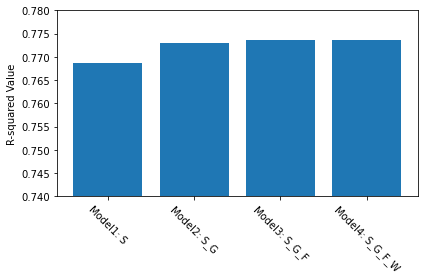

In [50]:

fig = plt.figure() 

df1 = model1_1.rsquared
df2 = model2_1.rsquared
df3 = model3_1.rsquared
df4 = model4_1.rsquared





r2=[
df1, df2, df3, df4
]

model_names = ['Model1: S', 'Model2: S_G', 'Model3: S_G_F', "Model4: S_G_F_W" ]

plt.bar(x=model_names, height=r2)
plt.ylabel('R-squared Value')
plt.xticks(rotation=-45)
plt.ylim(0.74, 0.78)

plt.savefig('Image/r2')

plt.tight_layout();

#### Interpretation of our inferential model.

The figure below plots our regression line. The black straight line is our estimation line for when a house grade is average or below, and the red line is when a house grade is above average. The distance between these two lines was around 47,000 USD. If everything else is constat, a price of a house that has been graded as above average will be about 47,000 USD higher. The slope of the line is about 190. This means if everything else is constant, an increase of one square foot of living area is associated with an additional 190 USD in housing price. 


In [51]:
model2_1.params

Intercept                  -92989.580897
C(grade_above_ave)[T.1]     47752.930219
C(zipcode)[T.98002]         16891.869539
C(zipcode)[T.98003]          2016.860781
C(zipcode)[T.98004]        715779.451817
                               ...      
C(zipcode)[T.98178]         70416.395227
C(zipcode)[T.98188]         34041.629444
C(zipcode)[T.98198]         55848.192287
C(zipcode)[T.98199]        423115.906483
sqft_living                   188.765716
Length: 72, dtype: float64

In [52]:
# fitted line for houses with below average grade (grade above average= 0) (zipcode = 98002)
line1 = 47752*0 + 188*df.sqft_living + model2_1.params[0] + 16891

# fitted line for houses with above average grade (grade above average= 1) (zipcode = 98002)
line2 = 47752*1 + 188*df.sqft_living + model2_1.params[0] + 16891



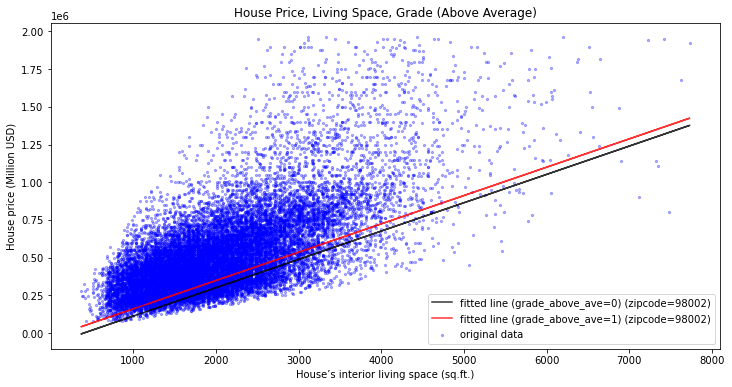

<Figure size 432x288 with 0 Axes>

In [53]:
# Interpretation of two strongly related features 

import plotly.express as px 


plt.figure(figsize=(12, 6))
plt.scatter(x = df.sqft_living , 
            y = df.price , 
            c='b', s=5,
            alpha=0.3, label='original data')

plt.plot(df.sqft_living , line1, c='black', alpha=0.8, label='fitted line (grade_above_ave=0) (zipcode=98002)')
plt.plot(df.sqft_living , line2, c='red', alpha=0.8, label='fitted line (grade_above_ave=1) (zipcode=98002)')



plt.xlabel("House’s interior living space (sq.ft.)")
plt.ylabel("House price (Million USD)")
plt.title("House Price, Living Space, Grade (Above Average)")
#plt.plot(xs, ys, label = 'f(x)')



plt.legend()
plt.show()

plt.tight_layout();

#### Linearity, Normality, Homoscedasticity, and Multicollinearity

- Additional checks show that this model failed the normality and homoscedasticity assumptions. As the housing price goes up, the model deviates from the normality assumption, and the residuals of the model vary more. 
- Moreover, the condition number is very large. We expect strong multicollinearity.

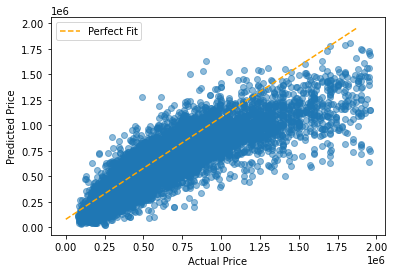

In [54]:
# Linearity check 
x_cols = ['sqft_living', 'grade_above_ave', 'zipcode']
preds = model2_1.predict(df[x_cols])

fig, ax = plt.subplots()

perfect_line = np.arange(df.price.min(), df.price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<ipython-input-55-6796f7ae56fa>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


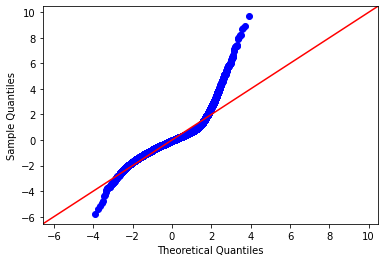

In [55]:
# QQ normality check here
import scipy.stats as stats

residuals = model2_1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show();


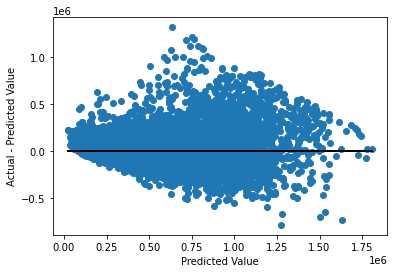

In [56]:
# Homoskedasticity 
plt.figure()
x_cols = ['sqft_living', 'grade_above_ave', 'zipcode']
plt.scatter(model2_1.predict(df[x_cols]), model2_1.resid)
plt.plot(model2_1.predict(df[x_cols]), [0 for i in range(len(df))], c='black')

plt.xlabel("Predicted Value")
plt.ylabel("Actual - Predicted Value");


## 4. 2 Predictive Model: Model to support client's price prediction for a new house
- We developed the price-prediction model using the results of the inferential analysis. The first model was a dummy regressor, which is equal to a random selection model. Then, we included all of the features and tweaked the variables using a machine-learning algorithm (Feature Ranking with Recursive Feature Elimination) and insights from the inferential analysis. 

##### Baseline Model

In [57]:
dfp = df.drop(labels=(['yr_built', 'yr_sold', 'grade_above_ave']), axis=1)


In [58]:
y = dfp.price
X = dfp.drop(labels=['price_log', 'price'], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17103 4276 17103 4276


In [59]:
# Baseline model 

dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
  
dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)

y_hat_train_mean = dummy_mean.predict(X_train)
y_hat_test_mean = dummy_mean.predict(X_test)

y_hat_train_median = dummy_median.predict(X_train)
y_hat_test_median = dummy_median.predict(X_test)

In [60]:
# R2 score - baseline model (mean) 
print(f"R2 score for baseline model (mean) with train data: {dummy_mean.score(X_train, y_train)}")
print(f"R2 score for baseline model (mean) with test data: {dummy_mean.score(X_test, y_test)}")


R2 score for baseline model (mean) with train data: 0.0
R2 score for baseline model (mean) with test data: -7.404622807127836e-05


In [61]:
# MSE - baseline model (mean) 
train_mse_mean = mean_squared_error(y_train, y_hat_train_mean)
test_mse_mean = mean_squared_error(y_test, y_hat_test_mean)
print('Train Mean Squarred Error (mean model):', train_mse_mean)
print('Test Mean Squarred Error (mean model):', test_mse_mean)

Train Mean Squarred Error (mean model): 80656747704.84573
Test Mean Squarred Error (mean model): 82858908934.07922


In [62]:
# RMSE - baseline model (mean) 
train_rmse_mean = mean_squared_error(y_train, y_hat_train_mean, squared=False)
test_rmse_mean = mean_squared_error(y_test, y_hat_test_mean, squared=False)
print('Train Root Mean Squarred Error (mean model):', train_rmse_mean)
print('Test Root Mean Squarred Error (mean model):', test_rmse_mean)

Train Root Mean Squarred Error (mean model): 284001.3163787199
Test Root Mean Squarred Error (mean model): 287852.2345476568


In [63]:
# R2 score - baseline model (median)
print(f"R2 score for baseline model (median) with train data: {dummy_median.score(X_train, y_train)}")
print(f"R2 score for baseline model (median) with test data: {dummy_median.score(X_test, y_test)}")


R2 score for baseline model (median) with train data: -0.05699177357102814
R2 score for baseline model (median) with test data: -0.05960896942741489


In [64]:
# MSE - baseline model (median) 
train_mse_median = mean_squared_error(y_train, y_hat_train_median)
test_mse_median = mean_squared_error(y_test, y_hat_test_median)
print('Train Mean Squarred Error (median model):', train_mse_median)
print('Test Mean Squarred Error (median model):', test_mse_median)

Train Mean Squarred Error (median model): 85253518807.01584
Test Mean Squarred Error (median model): 87791542470.94318


In [65]:
# RMSE - baseline model (median) 
train_mse_median = mean_squared_error(y_train, y_hat_train_median, squared=False)
test_mse_median = mean_squared_error(y_test, y_hat_test_median, squared=False)
print('Train Root Mean Squarred Error (median model):', train_mse_median)
print('Test Root Mean Squarred Error (median model):', test_mse_median)

Train Root Mean Squarred Error (median model): 291982.05220015807
Test Root Mean Squarred Error (median model): 296296.376067854


##### Model with All Numeric Features

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

print(f"R2 score with train data: {lr.score(X_train, y_train)}")
print(f"R2 score with test data: {lr.score(X_test, y_test)}")


R2 score with train data: 0.6487075373755764
R2 score with test data: 0.6437442181557723


In [67]:
train_mse_model1 = mean_squared_error(y_train, y_hat_train)
test_mse_model1 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse_model1)
print('Test Mean Squarred Error:', test_mse_model1)

Train Mean Squarred Error: 28334107528.51208
Test Mean Squarred Error: 29516779778.86262


In [68]:
train_rmse_model1 = mean_squared_error(y_train, y_hat_train, squared=False)
test_rmse_model1 = mean_squared_error(y_test, y_hat_test, squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model1)
print('Test Root Mean Squarred Error:', test_rmse_model1)

Train Root Mean Squarred Error: 168327.38199268733
Test Root Mean Squarred Error: 171804.48125372813


##### Model with Selected Features

Using **Feature Ranking with Recursive Feature Elimination**, we select the most important features.

In [69]:
# Scale the data to normalize the coefficients
X_train_for_RFE = StandardScaler().fit_transform(X_train)

model_for_RFE = LinearRegression()

# Instantiate and fit the selector
selector = RFE(model_for_RFE)
selector.fit(X_train_for_RFE, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: False
bathrooms: False
sqft_living: True
sqft_lot: False
floors: False
grade: True
zipcode: False
vintage: True
cond_good: False
waterfront__YES: True
seattle: True


In [70]:
# Use the selected columns 
selectedcolumns = X_train.columns[selector.support_]

model_for_RFE.fit(X_train[selectedcolumns],y_train)

y_hat_train_RFE = model_for_RFE.predict(X_train[selectedcolumns])
y_hat_test_RFE = model_for_RFE.predict(X_test[selectedcolumns])


print(f"R2 score with train data: {model_for_RFE.score(X_train[selectedcolumns], y_train)}")
print(f"R2 score with test data: {model_for_RFE.score(X_test[selectedcolumns], y_test)}")


R2 score with train data: 0.6390325638027552
R2 score with test data: 0.6351170927246153


In [71]:
train_mse_model2 = mean_squared_error(y_train, y_hat_train_RFE)
test_mse_model2 = mean_squared_error(y_test, y_hat_test_RFE)
print('Train Mean Squarred Error:', train_mse_model2)
print('Test Mean Squarred Error:', test_mse_model2)


Train Mean Squarred Error: 29114459431.02617
Test Mean Squarred Error: 30231561052.468533


In [72]:
train_rmse_model2 = mean_squared_error(y_train, y_hat_train_RFE,  squared=False)
test_rmse_model2 = mean_squared_error(y_test, y_hat_test_RFE,  squared=False)
print('Train Root Mean Squarred Error:', train_rmse_model2)
print('Test Root Mean Squarred Error:', test_rmse_model2)

Train Root Mean Squarred Error: 170629.5971718452
Test Root Mean Squarred Error: 173872.25498183584


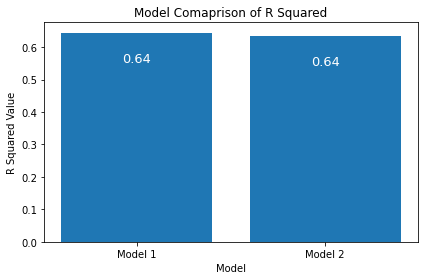

In [73]:

fig = plt.figure()


r1 = lr.score(X_test, y_test)
r2 = model_for_RFE.score(X_test[selectedcolumns], y_test) 

xr2= [r1, r2]
model_names=['Model 1', 'Model 2']

plt.bar(x=model_names, height=xr2)
plt.title('Model Comaprison of R Squared')
plt.xlabel('Model')
plt.ylabel('R Squared Value')


for i in range(len(xr2)):
    plt.annotate(str(xr2[i].round(2)), xy=(model_names[i], xr2[i]-0.1), ha='center', va='bottom', color ='white',
                fontsize=13)

plt.savefig('Image/r2_prediction')
 
plt.tight_layout();

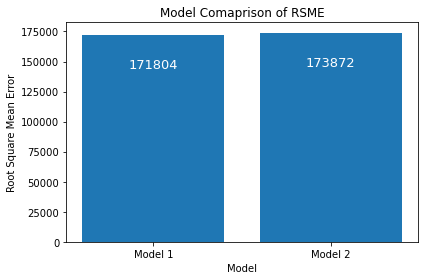

In [74]:
fig = plt.figure()

rsme1 = lr.score(X_test, y_test)
rsme2 = model_for_RFE.score(X_test[selectedcolumns], y_test)


x1rsme=[ test_rmse_model1, test_rmse_model2]
model_names=['Model 1', 'Model 2']

plt.bar(x=model_names, height=x1rsme)
plt.title('Model Comaprison of RSME')
plt.xlabel('Model')
plt.ylabel('Root Square Mean Error')
#for index,data in enumerate():
#    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))


for i in range(len(x1rsme)):
    plt.annotate(str(int(x1rsme[i].round(0))), xy=(model_names[i], x1rsme[i]-30000), ha='center', va='bottom', color ='white', fontsize=13)

plt.savefig('Image/rsme_prediction')    
    
plt.tight_layout();

Despite various trials, the prediction accuracy of our model was low. Root Man Squared Errors by our models are around 216,000. Given that average housing price for this dataset is about 540,000(USD), the error rates in our model were around 40%. 

## 5. Conclusion and next steps

In conclusion we recomend that Zillow continues to use their current model. The model they currenly use has an error rate of 2.3%. Our model had an error rate near 40%. The lack of homoskedasity and linear correlation suggests that linear regression models are not a good fit for this problem. Further infomation would help as well. Getting data about income in the area, population trends, and a myraid of other factors would reduce model error.